# Final Project for AI 221

AI 221 | 1st Sem AY 2024-2025  
Students: Jemima Bian Anila, Joshua Cantor, Michael Spencer Quinto, MEng in AI  
Instructors: Dr. Miguel Remolona | Dr. Jon Dewitt Dalisay

## Dataset

https://data.mendeley.com/datasets/tsvdyhbphs/1

https://www.kaggle.com/datasets/jaydepaolomirandilla/philippine-medicinal-plant-leaf-dataset/data


In [21]:
import sys
from pathlib import Path
  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import torch  
import cv2
import random



%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Add project root directory to Python path to allow importing from src folder
notebook_dir = Path("__file__").resolve().parent
project_root = Path.cwd().parent
sys.path.append(str(project_root))

In [4]:
print(torch.cuda.is_available())

True


# Import utility modules from `src` folder

Note: all reusable code like transformations for the dataframes, etc. can be found inside the `src` folder and are imported here for better modularity and version control


In [33]:
from src.utils_nn import SampleNN, test_function
from src.utils_image_conversion import (
    PROCESSED_DATA_FOLDER,
    HIBISCUS_PROCESSED_FOLDER,
    CARMONA_RETUSA_PROCESSED_FOLDER,
    AVERRHOEA_BILIMBI_PROCESSED_FOLDER,
)
from src.utils_preprocessing import detect_edges_and_lines

In [9]:
print(PROCESSED_DATA_FOLDER.relative_to(project_root))
print(HIBISCUS_PROCESSED_FOLDER.relative_to(project_root))

data/ph_med_plants_reduced_sizes
data/ph_med_plants_reduced_sizes/1Hibiscus rosa-sinensis(HRS)


# 1. Exploratory Data Analysis


## 1.1 Data Loading and Inspection


In [16]:
# Get list of files in HIBISCUS_PROCESSED_FOLDER
hibiscus_files = list(HIBISCUS_PROCESSED_FOLDER.glob("*.webp"))
hibiscus_files_names = [file.name for file in hibiscus_files]
print(hibiscus_files_names)

['Class1_19.webp', 'Class1_93.webp', 'Class1_3.webp', 'Class1_37.webp', 'Class1_80.webp', 'Class1_17.webp', 'Class1_23.webp', 'Class1_22.webp', 'Class1_25.webp', 'Class1_39.webp', 'Class1_33.webp', 'Class1_95.webp', 'Class1_16.webp', 'Class1_115.webp', 'Class1_49.webp', 'Class1_32.webp', 'Class1_110.webp', 'Class1_108.webp', 'Class1_84.webp', 'Class1_111.webp', 'Class1_116.webp', 'Class1_7.webp', 'Class1_77.webp', 'Class1_69.webp', 'Class1_73.webp', 'Class1_89.webp', 'Class1_63.webp', 'Class1_58.webp', 'Class1_105.webp', 'Class1_18.webp', 'Class1_75.webp', 'Class1_106.webp', 'Class1_112.webp', 'Class1_27.webp', 'Class1_11.webp', 'Class1_52.webp', 'Class1_34.webp', 'Class1_104.webp', 'Class1_35.webp', 'Class1_65.webp', 'Class1_102.webp', 'Class1_76.webp', 'Class1_97.webp', 'Class1_44.webp', 'Class1_72.webp', 'Class1_1.webp', 'Class1_42.webp', 'Class1_38.webp', 'Class1_28.webp', 'Class1_6.webp', 'Class1_30.webp', 'Class1_62.webp', 'Class1_81.webp', 'Class1_96.webp', 'Class1_114.webp', 'C

In [39]:
# Total number of (all ) images
# Get total number of images across all classes
# Get total number of images across all subfolders
total_images = sum(
    len(list(folder.glob("*.webp")))
    for folder in PROCESSED_DATA_FOLDER.iterdir()
    if folder.is_dir()
)
print(f"Total number of images: {total_images}")
print("--------------------------------")

# Get number of images per subfolder
for folder in PROCESSED_DATA_FOLDER.iterdir():
    if folder.is_dir():
        num_images = len(list(folder.glob("*.webp")))
        print(f"{folder.name}: {num_images} images")

print("--------------------------------")
# Get total number of folders
num_folders = sum(1 for folder in PROCESSED_DATA_FOLDER.iterdir() if folder.is_dir())
print(f"\nTotal number of folders: {num_folders}")

Total number of images: 4711
--------------------------------
8Pepromia pellucida(PP): 140 images
29Premna odorata(PO): 120 images
39Manihot esculenta(ME): 124 images
17Senna alata(SA): 118 images
33Citrus microcarpa(CM): 110 images
10Coleus scutellarioides(CS): 120 images
23Pandanus amaryllifolius(PA): 108 images
1Hibiscus rosa-sinensis(HRS): 116 images
26Averrhoea bilimbi(AVB): 100 images
24Aloe barbadensis Miller(ABM): 130 images
16Carmona retusa(CR): 130 images
32Mangifera indica(MI): 110 images
22Nerium oleander(NO): 130 images
19Capsicum frutescens(CF): 126 images
4Vitex negundo(VN): 146 images
40Citrus maxima(CMA): 130 images
25Lagerstroemia speciosa(LS): 140 images
27Annona muricata(AM): 120 images
2Psidium guajava(PG): 110 images
30Gliricidia sepium(GS): 130 images
38Ipomoea batatas(IPB): 110 images
3Antidesma bunius(AB): 142 images
6Blumea balsamifera(BB): 110 images
28Citrus aurantiifolia(CIA): 116 images
21Ocimum basilicum(OB): 148 images
37Leucaena leucocephala(LL): 100 im

## 9 Random Hibiscus Images


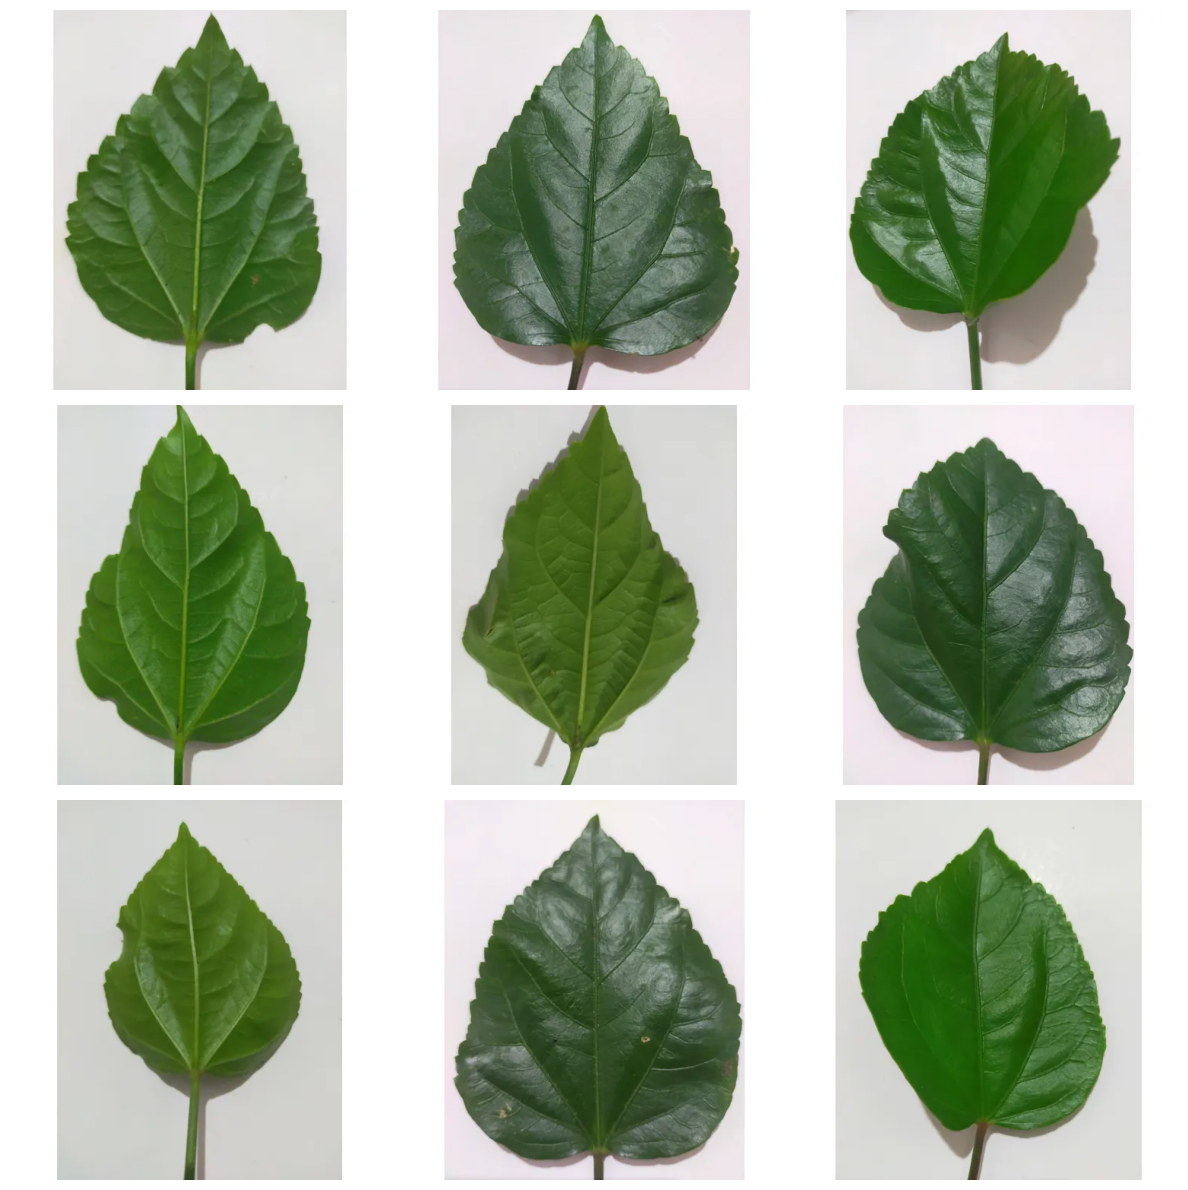

In [20]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Randomly sample 9 images
random_images = random.sample(hibiscus_files, 9)

# Plot each image
for idx, ax in enumerate(axes.flat):
    img = plt.imread(random_images[idx])
    ax.imshow(img)
    ax.axis("off")

# Adjust layout and display
plt.tight_layout()
plt.show()

## 9 random averrhoea bilimbi images


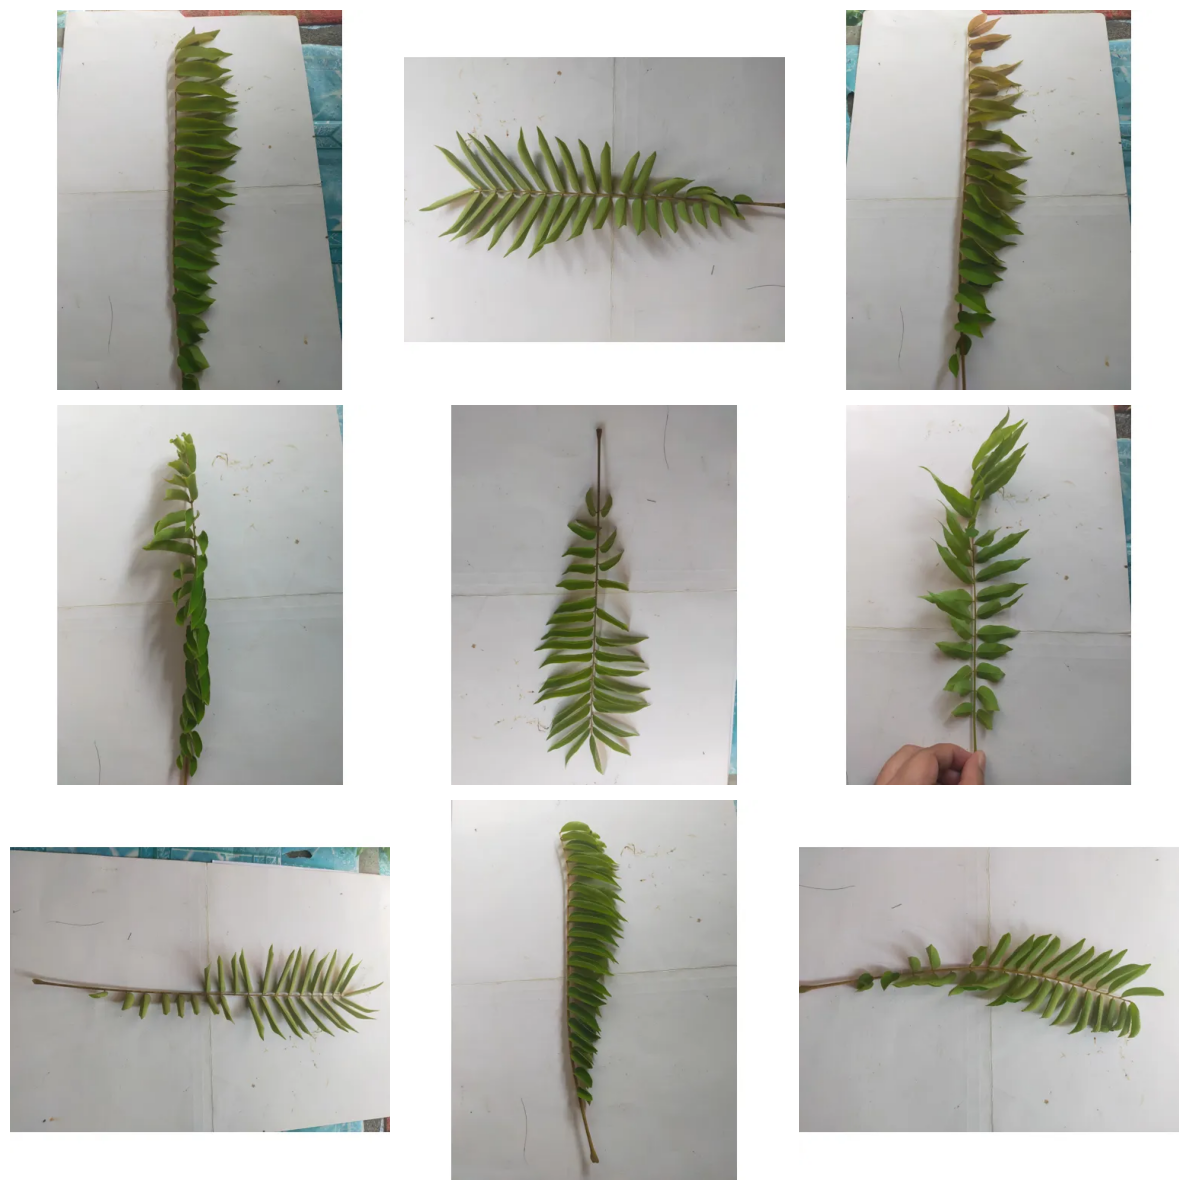

In [24]:
averrhoea_bilimbi_files = list(AVERRHOEA_BILIMBI_PROCESSED_FOLDER.glob("*.webp"))

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Randomly sample 9 images
random_images = random.sample(averrhoea_bilimbi_files, 9)

# Plot each image
for idx, ax in enumerate(axes.flat):
    img = plt.imread(random_images[idx])
    ax.imshow(img)
    ax.axis("off")

# Adjust layout and display
plt.tight_layout()
plt.show()

## Sample Image Processing


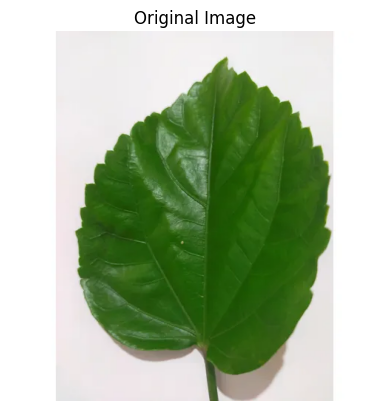

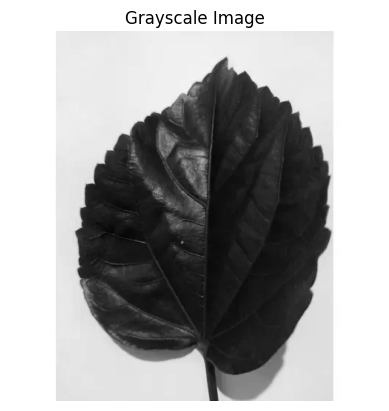

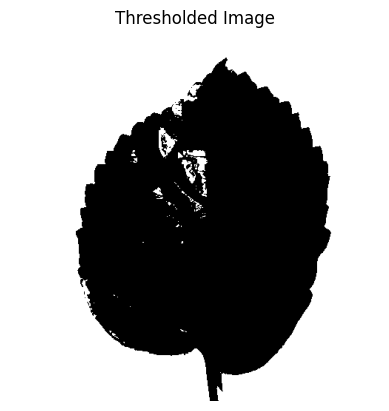

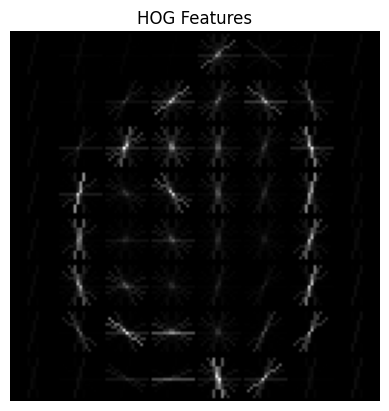

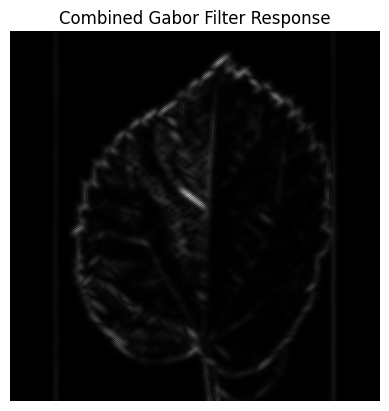

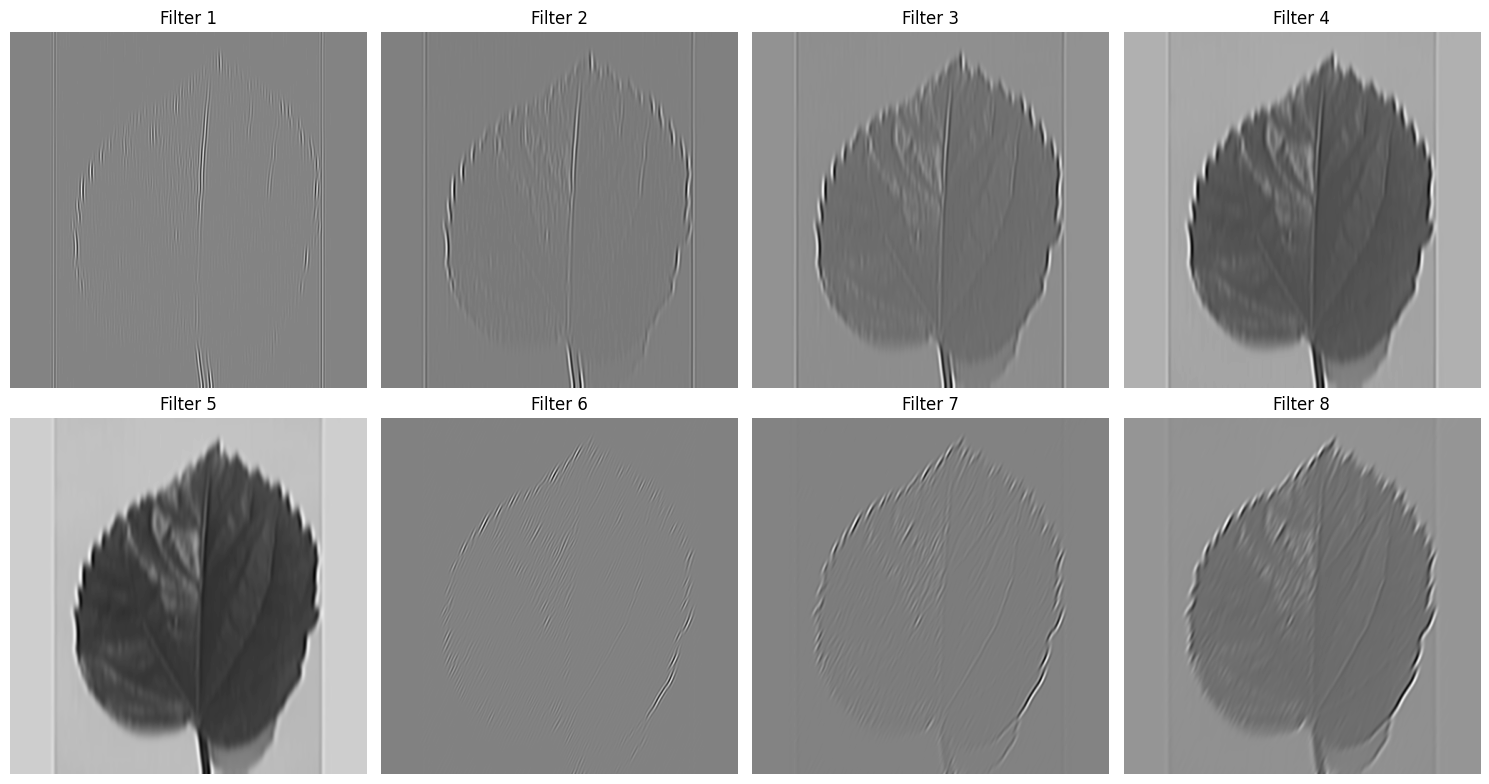

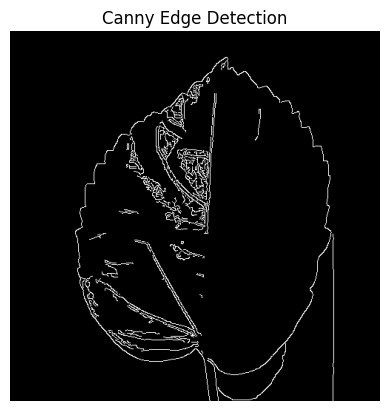

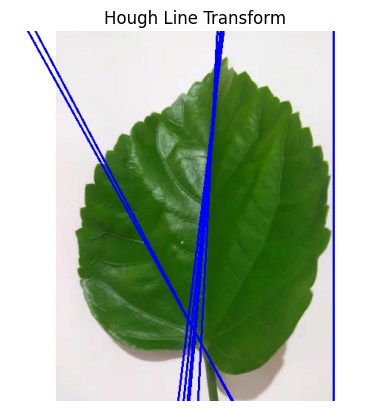

In [46]:
hibiscus_random = hibiscus_files[1]
sample_image = plt.imread(hibiscus_random)
plt.imshow(sample_image)
plt.axis("off")
plt.title("Original Image")
plt.show()

# Convert to grayscale and display
sample_img_gray = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(sample_img_gray, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image")
plt.show()

# Apply thresholding and display
_, sample_img_thresh = cv2.threshold(sample_img_gray, 127, 255, cv2.THRESH_BINARY)
plt.figure()
plt.imshow(sample_img_thresh, cmap="gray")
plt.axis("off")
plt.title("Thresholded Image")
plt.show()

import skimage

# Histogram of Oriented Gradients (HOG)
# Calculate HOG features
pixels_per_cell = (16, 16)  # Size of cell for HOG computation
cells_per_block = (2, 2)  # Number of cells in each block
orientations = 9  # Number of orientation bins

# Resize image to ensure consistent dimensions for HOG
resized_img = cv2.resize(sample_img_gray, (128, 128))

# Calculate HOG features and visualization
hog_features, hog_image = skimage.feature.hog(
    resized_img,
    orientations=orientations,
    pixels_per_cell=pixels_per_cell,
    cells_per_block=cells_per_block,
    visualize=True,
    block_norm="L2-Hys",
)

# Display HOG visualization
plt.figure()
plt.imshow(hog_image, cmap="gray")
plt.axis("off")
plt.title("HOG Features")
plt.show()


# Apply Gabor filters for texture analysis
def build_gabor_filters() -> list[np.ndarray]:
    """Build Gabor filters with different orientations and frequencies.

    Returns:
        list[np.ndarray]: List of Gabor kernels
    """
    filters: list[np.ndarray] = []
    ksize: int = 31  # Kernel size
    sigma: float = 3.0  # Standard deviation of Gaussian envelope
    lambda_min: float = 4.0  # Minimum wavelength
    lambda_max: float = 10.0  # Maximum wavelength
    num_thetas: int = 8  # Number of orientations
    num_lambdas: int = 5  # Number of wavelengths

    # Generate filters for different orientations and wavelengths
    for theta in np.linspace(0, np.pi, num_thetas):
        for lambda_ in np.linspace(lambda_min, lambda_max, num_lambdas):
            kernel = cv2.getGaborKernel(
                (ksize, ksize),
                sigma=sigma,
                theta=theta,
                lambd=lambda_,
                gamma=0.5,  # Spatial aspect ratio
                psi=0,  # Phase offset
            )
            kernel /= 1.5 * kernel.sum()
            filters.append(kernel)
    return filters


def apply_gabor_filters(
    image: np.ndarray, filters: list[np.ndarray]
) -> tuple[np.ndarray, list[np.ndarray]]:
    """Apply Gabor filters to an image.

    Args:
        image: Input grayscale image
        filters: List of Gabor kernels

    Returns:
        tuple containing:
            - Combined filtered image
            - List of individual filter responses
    """
    responses: list[np.ndarray] = []
    for kernel in filters:
        response = cv2.filter2D(image, cv2.CV_32F, kernel)
        responses.append(response)

    # Combine responses
    combined = np.sqrt(
        np.sum(np.array([response**2 for response in responses]), axis=0)
    )
    return combined, responses


# Generate Gabor filters
gabor_filters = build_gabor_filters()

# Apply filters to grayscale image
gabor_combined, gabor_responses = apply_gabor_filters(sample_img_gray, gabor_filters)

# Display combined Gabor response
plt.figure()
plt.imshow(gabor_combined, cmap="gray")
plt.axis("off")
plt.title("Combined Gabor Filter Response")
plt.show()

# Display first few individual Gabor responses
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
for idx, ax in enumerate(axes.flat[:8]):
    ax.imshow(gabor_responses[idx], cmap="gray")
    ax.axis("off")
    ax.set_title(f"Filter {idx+1}")
plt.tight_layout()
plt.show()


edges, line_image = detect_edges_and_lines(sample_image)